<a href="https://colab.research.google.com/github/sangjin94/SQL_ITWILL/blob/main/da07_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# mpg 데이터 셋 

In [ ]:
mpg=sns.load_dataset('mpg')

In [ ]:
mpg.info()
# data.type,(row)index,columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [ ]:
mpg.shape

(398, 9)

In [ ]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mpg['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [ ]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [ ]:
mpg['name'].value_counts()

ford pinto                  6
ford maverick               5
toyota corolla              5
amc matador                 5
amc gremlin                 4
                           ..
buick skylark limited       1
chevrolet cavalier          1
chevrolet cavalier wagon    1
fiat 124b                   1
amc concord d/l             1
Name: name, Length: 305, dtype: int64

* 2개의 연속형 두 변수 간의 상관 관계: scatter plot
  * mpg(연비) ~ displacement(배기량) scatter plot
  * 2x2 subplot들을 생성
    * mpg ~ cylinder scatter
    * mpg ~ horsepower scatter
    * mpg ~ weight scatter
    * mpg ~ acceleration scatter 

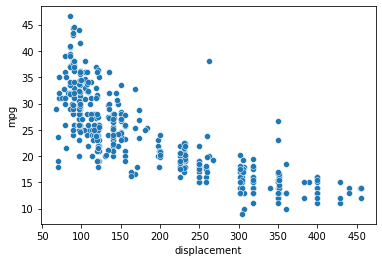

In [ ]:
sns.scatterplot(x='displacement',y='mpg',data=mpg)

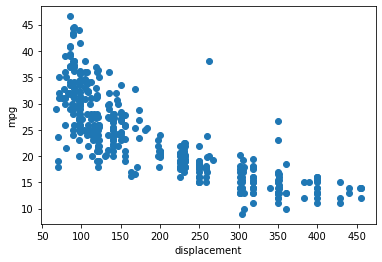

In [ ]:
plt.plot('displacement', 'mpg', data=mpg, marker='o', linestyle='')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

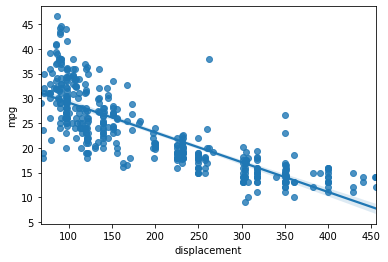

In [ ]:
sns.regplot(x='displacement', y='mpg', data=mpg)  # scatter + linear regression
plt.show()

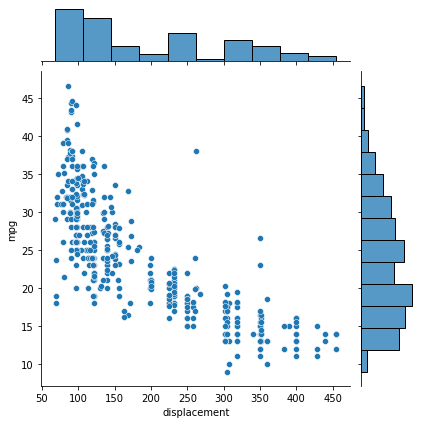

In [ ]:
sns.jointplot(x='displacement', y='mpg', data=mpg)  # scatter + histogram
plt.show()

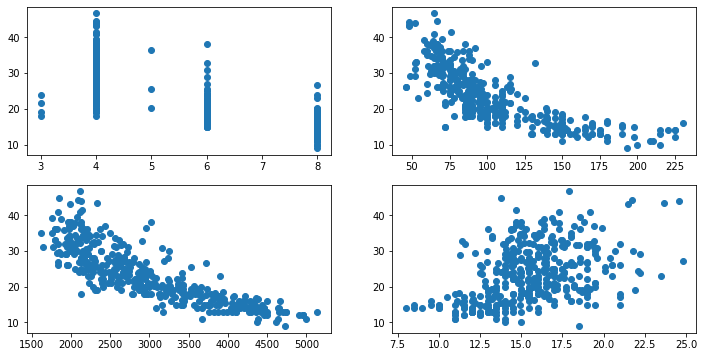

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,6))
ax[0,0].scatter(x='cylinders',y='mpg',data=mpg)
ax[0,1].scatter(x='horsepower',y='mpg',data=mpg)
ax[1,0].scatter(x='weight',y='mpg',data=mpg)
ax[1,1].scatter(x='acceleration',y='mpg',data=mpg)


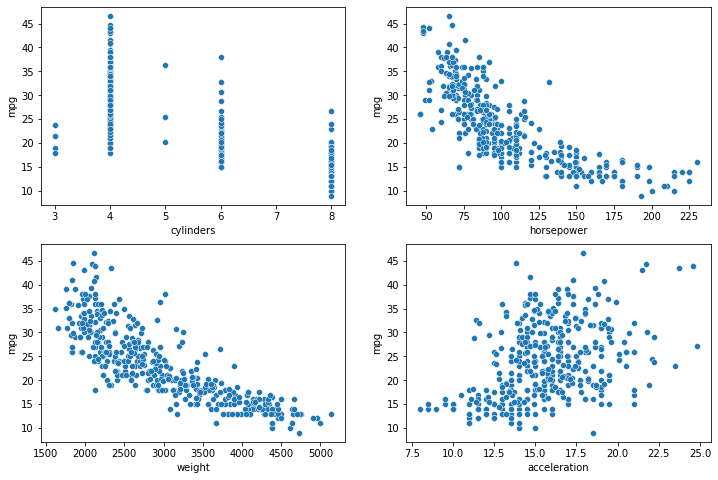

In [ ]:
# 2x2 subplot 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 각 subplot에 scatter plot을 표현
sns.scatterplot(x='cylinders', y='mpg', data=mpg, ax=ax[0, 0])
sns.scatterplot(x='horsepower', y='mpg', data=mpg, ax=ax[0, 1])
sns.scatterplot(x='weight', y='mpg', data=mpg, ax=ax[1, 0])
sns.scatterplot(x='acceleration', y='mpg', data=mpg, ax=ax[1, 1])

# plot 보여주기
plt.show()


cylinder별 mpg 평균 막대 그래프

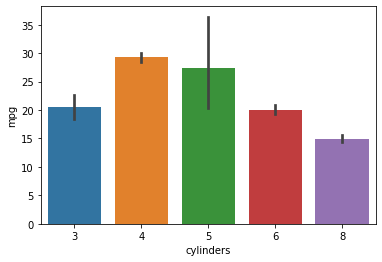

In [ ]:
sns.barplot(y='mpg',x='cylinders',data=mpg)

In [ ]:
cylinders=mpg['cylinders'].unique()
cylinders.sort() # 배열을 정렬된 상태로 변환
print(cylinders)

[3 4 5 6 8]


In [ ]:
mean_mpg=[] # cylinder 개수별 mpg의 평균을 저장할 리스트
for c in cylinders:
  mu=mpg[mpg['cylinders']==c]['mpg'].mean()
  # print(mu)
  mean_mpg.append(mu)

s=pd.Series(data=mean_mpg,index=cylinders)
s

3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
dtype: float64

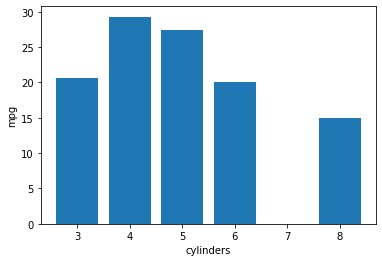

In [ ]:
plt.bar(x=s.index, height=s.values)
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.show()

cyliner별 mpg box plot

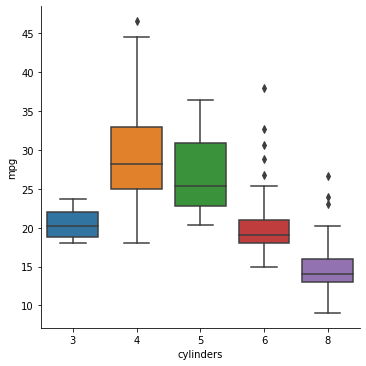

In [ ]:
sns.catplot(y='mpg',x='cylinders',data=mpg,kind='box')

origin별, cylinder별 mpg box plot

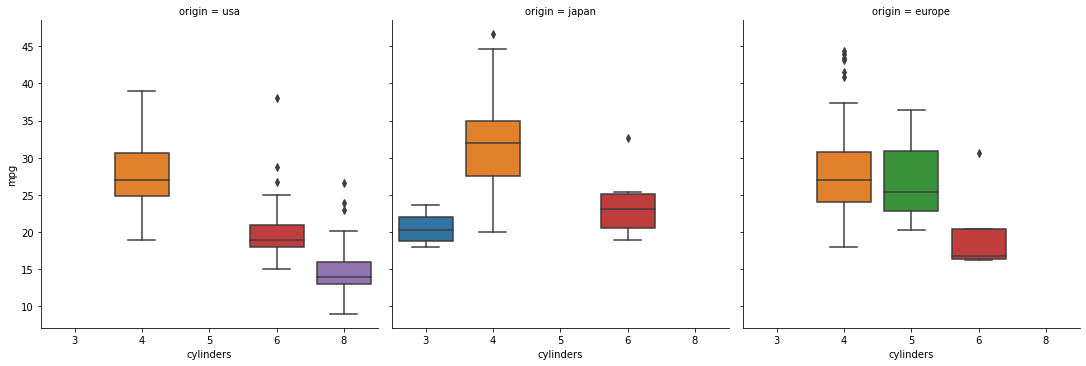

In [ ]:
sns.catplot(y='mpg',x='cylinders',data=mpg,kind='box',col='origin')

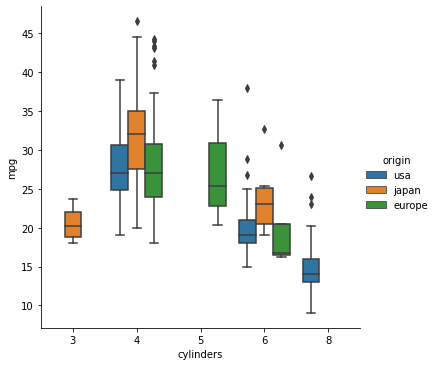

In [ ]:
sns.catplot(y='mpg',x='cylinders',data=mpg,kind='box',hue='origin')


origin별, cylinder별 mpg 평균 막대 그래프

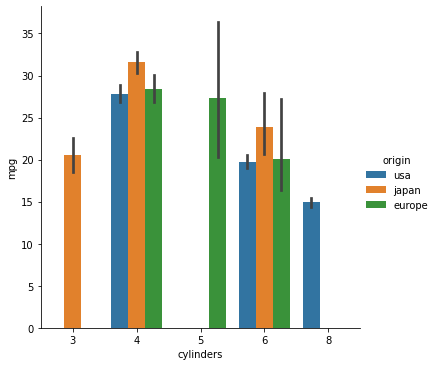

In [ ]:
sns.catplot(y='mpg',x='cylinders',data=mpg,kind='bar',hue='origin')


iris 데이터 셋
* 데이터 셋 탐색
* 품종을 제외한 4개 변수의 boxplot
* 품종별로 Subplot의 컬럼을 구분하고, 숫자 타입 변수들의 boxplot을 각 품종별로 시각화
* petal_width ~ petal_length scatter plot. 품종별로 점의 색깔을 다르게.
* 모든 연속형 변수들 간의 상관 관계 scatter plot - Pair Plot

In [ ]:
iris=sns.load_dataset('iris')

In [ ]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

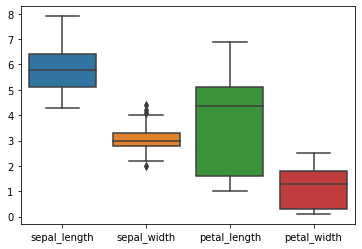

In [ ]:
# 품종을 제외한 4개 변수의 boxplot
sns.boxplot(data=iris)# 데이터프레임의 모든 숫자 타입 변수들의 boxplot을 그려줌
plt.show()

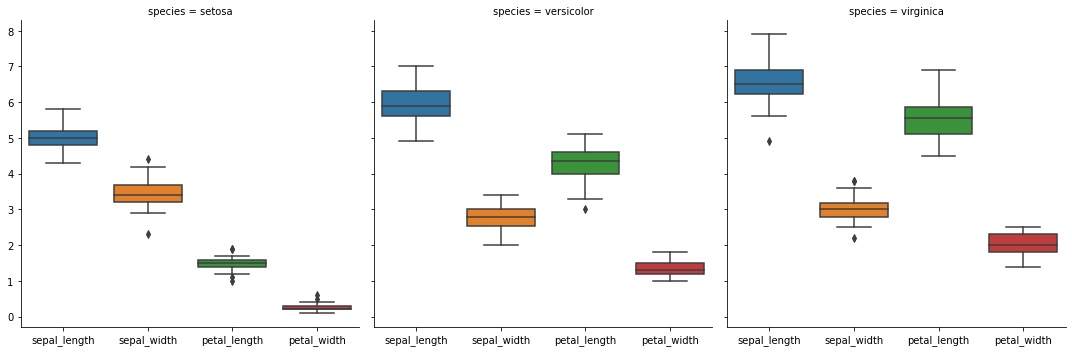

In [ ]:
# 품종별로 Subplot의 컬럼을 구분하고, 숫자 타입 변수들의 boxplot을 각 품종별로 시각화
sns.catplot(data=iris, col='species',kind='box' )

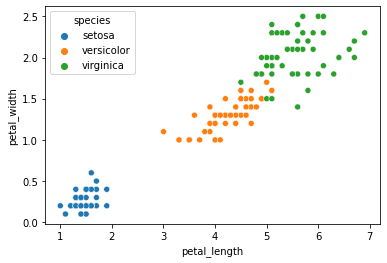

In [ ]:
# petal_width ~ petal_length scatter plot. 품종별로 점의 색깔을 다르게.
sns.scatterplot(data=iris,x='petal_length',y='petal_width',hue='species')
plt.show()

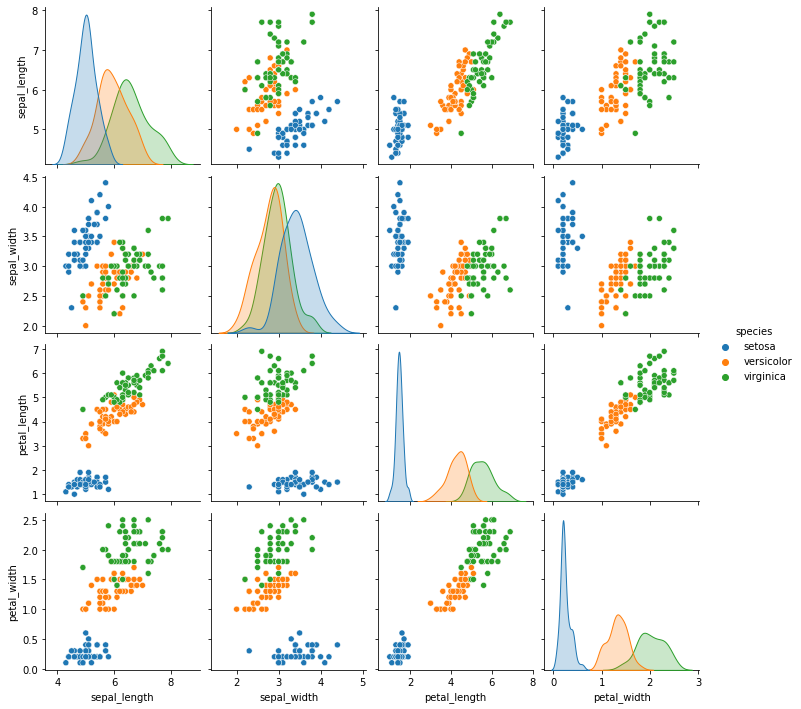

In [ ]:
# 모든 연속형 변수들 간의 상관 관계 scatter plot - Pair Plot
# 대각선라인에는 그 그래프의 히스토그램을 그려줌
# 나머지는 각변수들간의 산점도를 그려줌 
sns.pairplot(data=iris,hue='species')
plt.show()

* mpg 데이터 프레임에서 mpg, cylinders, diplacement, horsepower,weight의 pair plot

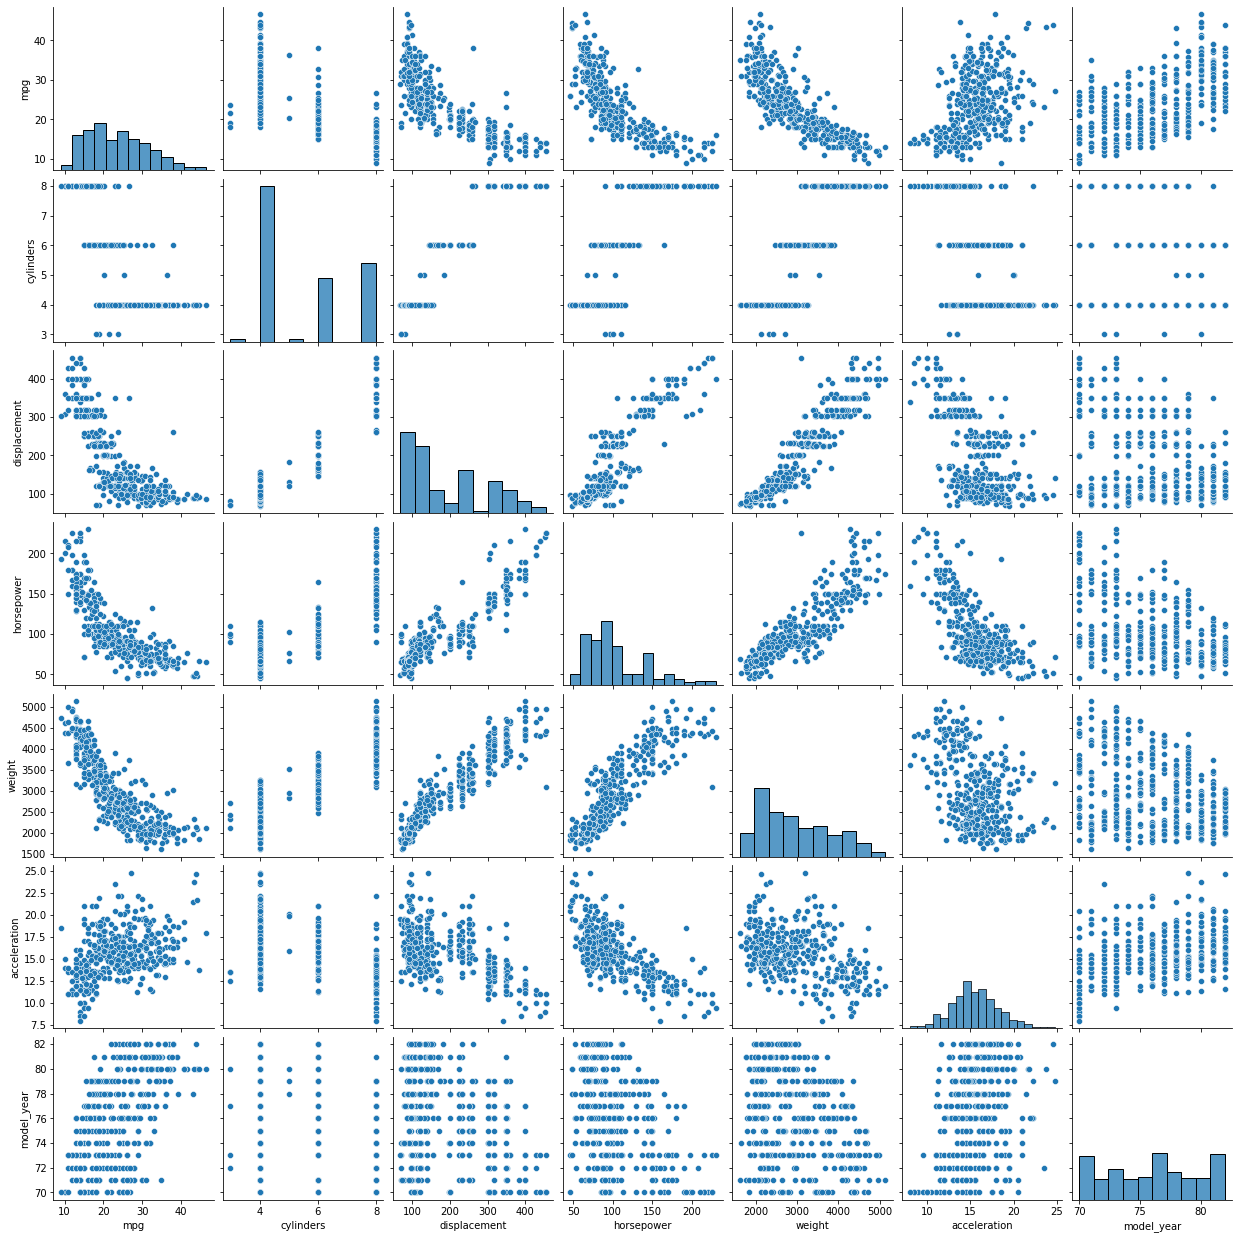

In [ ]:
sns.pairplot(data=mpg)